In [12]:
#IMPORTS

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


from scipy.stats import zscore
from scipy import stats
from scipy.stats import chi2_contingency

In [13]:
#LOAD SOF PUF 2015 FILE

file_path = 'SOF PUF 2015.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RREG            5440 non-null   int64  
 1   HHNUM           5440 non-null   int64  
 2   RRPL            5440 non-null   int64  
 3   RSTR            5440 non-null   int64  
 4   RPSU            5440 non-null   int64  
 5   RROTATION       5440 non-null   int64  
 6   RQ1_LNO         5440 non-null   int64  
 7   RQ2_REL         5440 non-null   int64  
 8   RQ3_SEX         5440 non-null   int64  
 9   RQ4_AGE         5440 non-null   int64  
 10  RQ5_TMSLEFT     5440 non-null   int64  
 11  RQ6M_DTLEFT     5440 non-null   int64  
 12  RQ6Y_DTLEFT     5440 non-null   int64  
 13  RQ7_MSTAT       5438 non-null   float64
 14  RQ8_HGRADE      5440 non-null   int64  
 15  RQ9_USOCC       5440 non-null   int64  
 16  RQ10_REASON     5440 non-null   int64  
 17  RQ11_BASE       5012 non-null   f

Initial Inspection

In [14]:
data.head()

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND
0,1,1,1,21125,10,26,81,8,2,59,3,1,2015,3.0,4,131,6,NaN,500,18,1,513.0,24.0,2,NaN,NaN,NaN,7.0,2016.0,1,60000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,7500.0,483.3481,NaN
1,1,2,1,21125,10,26,3,3,1,29,1,7,2012,1.0,67,223,1,1.0,213,36,1,222.0,36.0,1,7.0,2015.0,2.0,NaN,NaN,1,15000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50000.0,1,8000.0,512.6429,1.0
2,1,2,1,21125,10,26,4,3,2,25,1,4,2012,2.0,67,223,1,1.0,233,24,1,223.0,24.0,1,4.0,2014.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60000.0,2,NaN,539.1801,2.0
3,1,2,1,21125,10,26,10,3,1,30,4,1,2015,1.0,68,512,1,1.0,234,12,1,512.0,40.0,2,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,8000.0,512.6429,1.0
4,1,3,1,21125,10,26,2,3,1,35,2,2,2011,2.0,4,721,2,1.0,214,36,1,826.0,45.0,1,12.0,2013.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,477.4089,2.0


In [15]:
data.tail()

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND
5435,42,4575,1,21204,6194,26,6,3,1,27,1,2,2013,1.0,64,23,1,1.0,213,36,1,312.0,31.0,2,NaN,NaN,NaN,2.0,2016.0,1,50000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,95.0,2,NaN,1,15000.0,812.9461,1.0
5436,42,4576,4,21112,6211,28,2,2,2,26,1,1,2012,2.0,4,21,1,1.0,234,36,1,421.0,36.0,1,1.0,2015.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,744.4370,2.0
5437,42,4577,2,21117,6219,26,7,3,1,34,1,10,2013,4.0,6,723,1,1.0,600,36,1,921.0,23.0,2,NaN,NaN,NaN,10.0,2016.0,1,44000.0,5.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,815.7081,1.0
5438,42,4578,2,21117,6219,26,9,3,1,30,4,4,2015,1.0,65,341,1,1.0,233,12,1,724.0,48.0,2,NaN,NaN,NaN,4.0,2016.0,1,25000.0,5.0,1.0,50.0,2.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,815.7081,1.0
5439,42,4579,2,21217,6228,26,13,3,2,34,2,9,2013,2.0,67,223,1,1.0,233,24,1,223.0,48.0,1,9.0,2015.0,2.0,NaN,NaN,1,60000.0,5.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,80000.0,1,15000.0,695.5465,1.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RREG            5440 non-null   int64  
 1   HHNUM           5440 non-null   int64  
 2   RRPL            5440 non-null   int64  
 3   RSTR            5440 non-null   int64  
 4   RPSU            5440 non-null   int64  
 5   RROTATION       5440 non-null   int64  
 6   RQ1_LNO         5440 non-null   int64  
 7   RQ2_REL         5440 non-null   int64  
 8   RQ3_SEX         5440 non-null   int64  
 9   RQ4_AGE         5440 non-null   int64  
 10  RQ5_TMSLEFT     5440 non-null   int64  
 11  RQ6M_DTLEFT     5440 non-null   int64  
 12  RQ6Y_DTLEFT     5440 non-null   int64  
 13  RQ7_MSTAT       5438 non-null   float64
 14  RQ8_HGRADE      5440 non-null   int64  
 15  RQ9_USOCC       5440 non-null   int64  
 16  RQ10_REASON     5440 non-null   int64  
 17  RQ11_BASE       5012 non-null   f

In [17]:
data.dtypes

RREG                int64
HHNUM               int64
RRPL                int64
RSTR                int64
RPSU                int64
RROTATION           int64
RQ1_LNO             int64
RQ2_REL             int64
RQ3_SEX             int64
RQ4_AGE             int64
RQ5_TMSLEFT         int64
RQ6M_DTLEFT         int64
RQ6Y_DTLEFT         int64
RQ7_MSTAT         float64
RQ8_HGRADE          int64
RQ9_USOCC           int64
RQ10_REASON         int64
RQ11_BASE         float64
RQ12_CTRY           int64
RQ13_STAY           int64
RQ14_INDWORK        int64
RQ15_OCCUP1       float64
RQ16_NOMONTH      float64
RQ17_RET            int64
RQ18M_DTRET       float64
RQ18Y_DTRET       float64
RQ19_REASON       float64
RQ20M_DTEXP       float64
RQ20Y_DTEXP       float64
RQ21_CASHREM        int64
RQ22_CASHAMT      float64
RQ23_MODE         float64
RQ241C_CONSUM     float64
RQ241P_CONSUM     float64
RQ242C_INVEST     float64
RQ242P_INVEST     float64
RQ243C_SAVINGS    float64
RQ243P_SAVINGS    float64
RQ244C_GIFT 

In [18]:
data.isnull().sum()

RREG                 0
HHNUM                0
RRPL                 0
RSTR                 0
RPSU                 0
RROTATION            0
RQ1_LNO              0
RQ2_REL              0
RQ3_SEX              0
RQ4_AGE              0
RQ5_TMSLEFT          0
RQ6M_DTLEFT          0
RQ6Y_DTLEFT          0
RQ7_MSTAT            2
RQ8_HGRADE           0
RQ9_USOCC            0
RQ10_REASON          0
RQ11_BASE          428
RQ12_CTRY            0
RQ13_STAY            0
RQ14_INDWORK         0
RQ15_OCCUP1        373
RQ16_NOMONTH       373
RQ17_RET             0
RQ18M_DTRET       4181
RQ18Y_DTRET       4181
RQ19_REASON       4181
RQ20M_DTEXP       1259
RQ20Y_DTEXP       1259
RQ21_CASHREM         0
RQ22_CASHAMT      1437
RQ23_MODE         1437
RQ241C_CONSUM     1507
RQ241P_CONSUM     1507
RQ242C_INVEST     4361
RQ242P_INVEST     4361
RQ243C_SAVINGS    3876
RQ243P_SAVINGS    3876
RQ244C_GIFT       4903
RQ244P_GIFT       4903
RQ245C_OTHERS     5392
RQ245P_OTHERS     5392
RQ25_RET6MOS         0
RQ26_CASHHO

In [19]:
data.duplicated().sum()

1

Univariate Analysis

In [20]:
#descriptive analysis
data.describe()

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND
count,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5438.000000,5440.000000,5440.000000,5440.000000,5012.000000,5440.000000,5440.000000,5440.000000,5067.000000,5067.000000,5440.000000,1259.000000,1259.000000,1259.000000,4181.000000,4181.000000,5440.000000,4003.000000,4003.000000,3933.0,3933.000000,1079.0,1079.000000,1564.0,1564.000000,537.0,537.000000,48.0,48.000000,5440.000000,975.000000,5440.000000,814.000000,5440.000000,5362.000000
mean,13.708272,2306.230331,2.493750,21170.534559,7816.958088,26.991912,4.789890,2.826654,1.534559,36.579044,2.006250,6.490441,2013.888971,1.826958,33.764890,418.355699,1.325000,1.129689,261.915625,25.758824,1.068750,667.439708,27.718571,1.769853,6.953137,2014.277998,2.289118,12.792155,2515.804831,1.264154,63923.842618,2.882838,1.0,82.087211,2.0,30.851715,3.0,23.180946,4.0,10.988827,5.0,37.625000,1.820772,72803.774359,1.850368,18317.119165,541.305478,1.155166
std,13.852386,1335.172225,1.113836,3954.024062,5298.529355,1.000059,11.122881,1.543244,0.498850,10.760527,1.986616,3.493895,1.191758,0.814862,29.818956,331.584532,1.081306,0.335994,86.308339,19.175003,0.253052,257.988282,16.750183,0.433022,3.924186,1.023065,0.578332,21.483155,1784.555012,0.440922,67404.802457,1.940652,0.0,22.246624,0.0,22.054963,0.0,18.353321,0.0,12.115576,0.0,26.419388,0.383578,83715.812143,0.356743,17235.232200,194.143317,0.362097
min,1.000000,1.000000,1.000000,10001.000000,10.000000,26.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2010.000000,1.000000,0.000000,11.000000,1.000000,1.000000,100.000000,0.000000,1.000000,111.000000,0.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,2015.000000,1.000000,1300.000000,1.000000,1.0,5.000000,2.0,1.000000,3.0,1.000000,4.0,1.000000,5.0,10.000000,1.000000,0.000000,1.000000,1000.000000,124.489100,1.000000
25%,3.000000,1137.750000,2.000000,21115.000000,2941.000000,26.000000,2.000000,2.000000,1.000000,28.000000,1.000000,4.000000,2013.000000,1.000000,4.000000,23.000000,1.000000,1.000000,222.000000,12.000000,1.000000,512.000000,13.000000,2.000000,5.000000,2014.000000,2.000000,4.000000,2016.000000,1.000000,28000.000000,1.000000,1.0,70.000000,2.0,15.000000,3.0,10.000000,4.0,5.000000,5.0,17.500000,2.000000,24000.000000,2.000000,7000.000000,415.825500,1.000000
50%,9.000000,2311.500000,2.000000,22111.000000,6843.000000,26.000000,3.000000,3.000000,2.000000,34.000000,2.000000,6.500000,2014.000000,2.000000,6.000000,421.000000,1.000000,1.000000,233.000000,24.000000,1.000000,724.000000,26.000000,2.000000,7.000000,2015.000000,2.000000,7.000000,2016.000000,1.000000,47000.000000,2.000000,1.0,90.000000,2.0,22.000000,3.0,20.000000,4.0,10.000000,5.0,30.000000,2.000000,50000.000000,2.000000,12000.000000,537.139100,1.000000
75%,14.000000,3460.250000,3.000000,23205.000000,13399.750000,28.000000,4.000000,3.000000,2.000000,43.000000,2.000000,9.000000,2015.000000,2.000000,65.000000,723.000000,1.000000,1.000000,234.000000,26.000000,1.000000,913.000000,41.000000,2.000000,9.000000,2015.000000,3.000000,11.000000,2017.000000,2.000000,77500.000000,5.000000,1.0,100.000000,2.0,45.000000,3.0,30.000000,4.0,10.000000,5.0,50.000000,2.000000,100000.000000,2.000000,25000.000000,655.102100,1.000000
max,42.000000,4579.000000,4.000000,29007.000000,16569.000000,28.000000,83.000000,11.000000,2.000000,86.000000,99.000000,99.000000,2015.000000,6.000000,90.000000,933.000000,8.000000,2.00000

IGNORE THESE HSHSHHS 

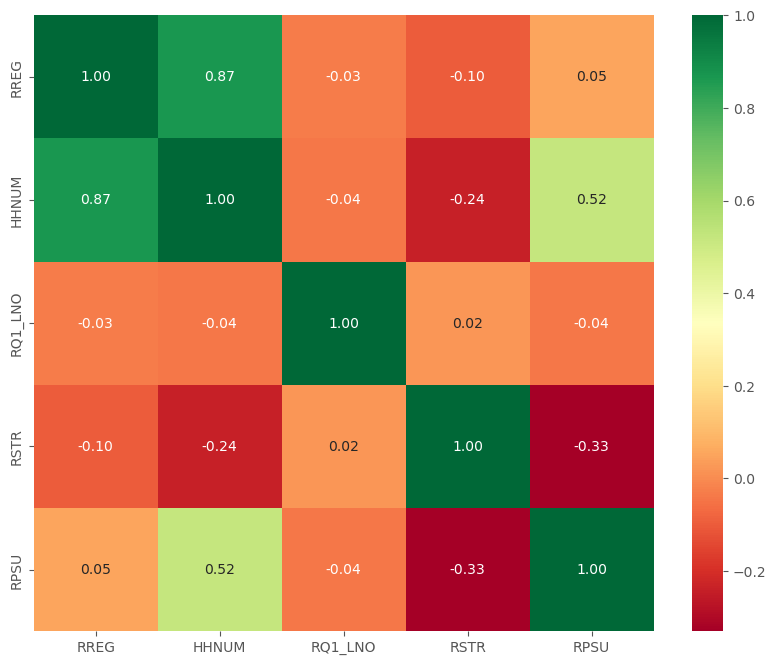

In [21]:

#selected_cols = ['RQ5_TMSLEFT', 'RQ6M_DTLEFT', 'RQ7_MSTAT', 'RQ9_USOCC', 'RQ10_REASON']
#selected_cols = ['RQ21_CASHREM', 'RQ22_CASHAMT', 'RQ241C_CONSUM', 'RQ243C_SAVINGS', 'RQ244C_GIFT']
#selected_cols = ['RQ17_RET', 'RQ18M_DTRET', 'RQ19_REASON', 'RQ20M_DTEXP', 'RQ16_NOMONTH']
#selected_cols = ['RQ3_SEX', 'RQ4_AGE', 'RQ8_HGRADE', 'RQ2_REL', 'RQ7_MSTAT']
#selected_cols = ['RQ9_USOCC', 'RQ14_INDWORK', 'RQ15_OCCUP1', 'RQ16_NOMONTH']
selected_cols = ['RREG', 'HHNUM', 'RQ1_LNO', 'RSTR', 'RPSU']

corr_matrix = data[selected_cols].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f')

plt.show()

Positively Correlated Pairs:
          Feature_1      Feature_2  Correlation
1              RREG          HHNUM         0.87
4              RREG           RPSU         0.05
9              RREG        RQ4_AGE         0.06
13             RREG      RQ7_MSTAT         0.03
16             RREG    RQ10_REASON         0.14
20             RREG   RQ14_INDWORK         0.19
26             RREG    RQ19_REASON         0.23
27             RREG    RQ20M_DTEXP         0.02
29             RREG   RQ21_CASHREM         0.13
30             RREG   RQ22_CASHAMT         0.04
33             RREG  RQ241P_CONSUM         0.07
46             RREG          RSWGT         0.21
47             RREG       RP6M_IND         0.16
52            HHNUM           RPSU         0.52
58            HHNUM    RQ5_TMSLEFT         0.01
64            HHNUM    RQ10_REASON         0.11
68            HHNUM   RQ14_INDWORK         0.15
74            HHNUM    RQ19_REASON         0.18
77            HHNUM   RQ21_CASHREM         0.12
89         

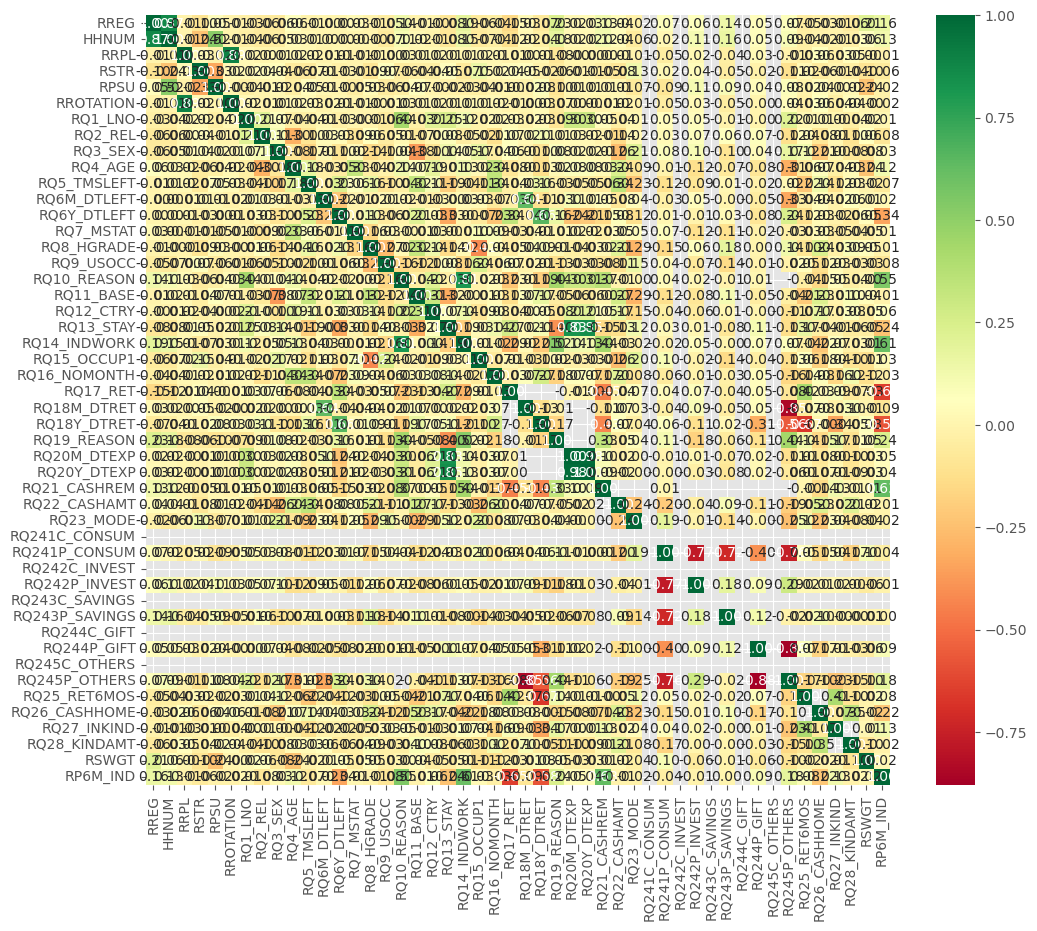

In [22]:
# Use all columns in the dataset
corr_matrix = data.corr().round(2)

# List of positively correlated pairs
positive_corr = corr_matrix.unstack().reset_index()
positive_corr.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter for positive correlations, remove self-correlations (Correlation == 1)
positive_corr = positive_corr[(positive_corr['Correlation'] > 0) & (positive_corr['Feature_1'] != positive_corr['Feature_2'])]

# Drop duplicates caused by the symmetric matrix
positive_corr = positive_corr.drop_duplicates(subset=['Correlation'])

# Display positively correlated pairs
print("Positively Correlated Pairs:")
print(positive_corr)
 
# Plot the heatmap for all columns
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

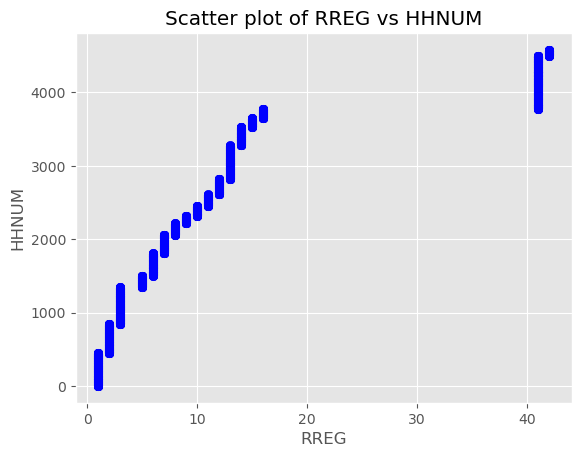

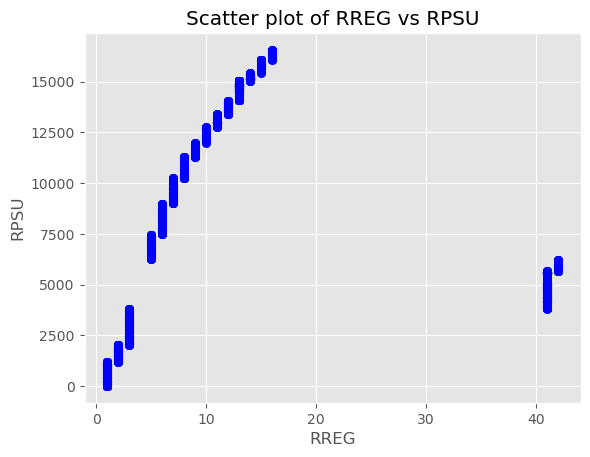

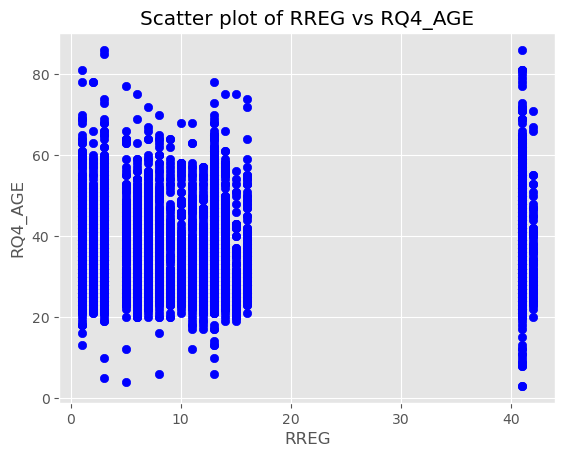

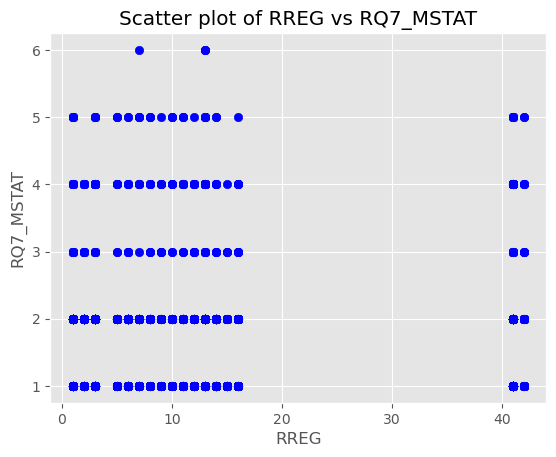

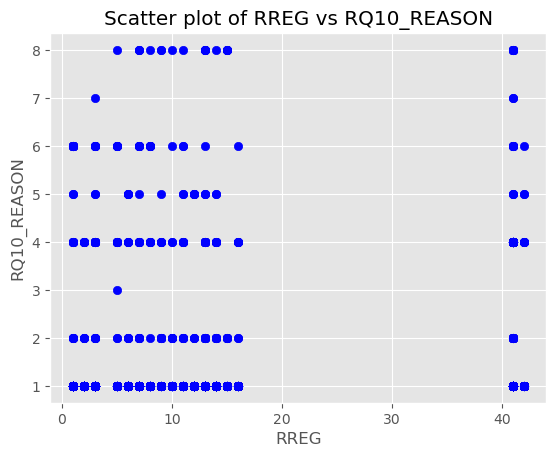

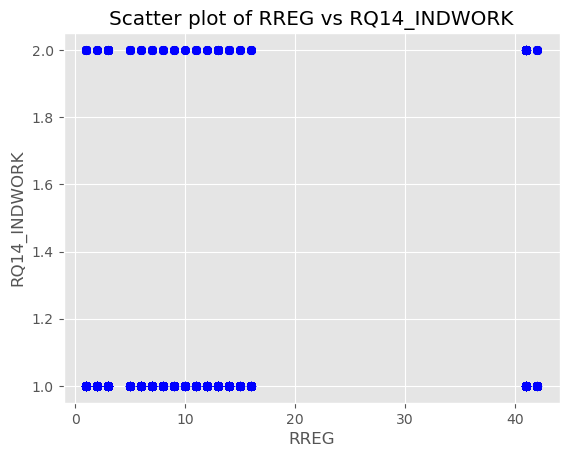

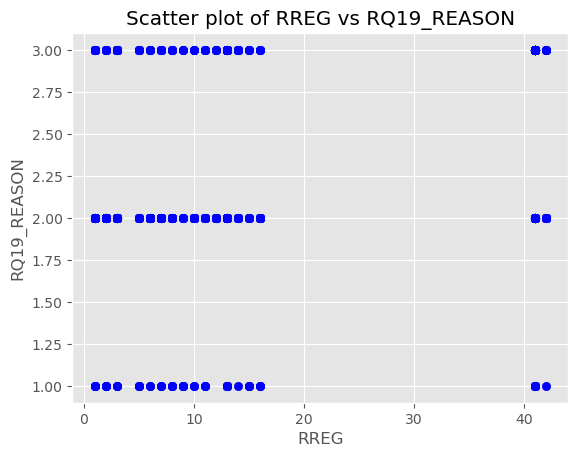

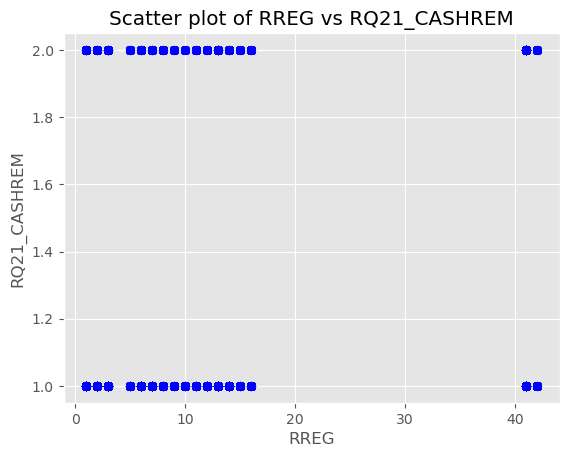

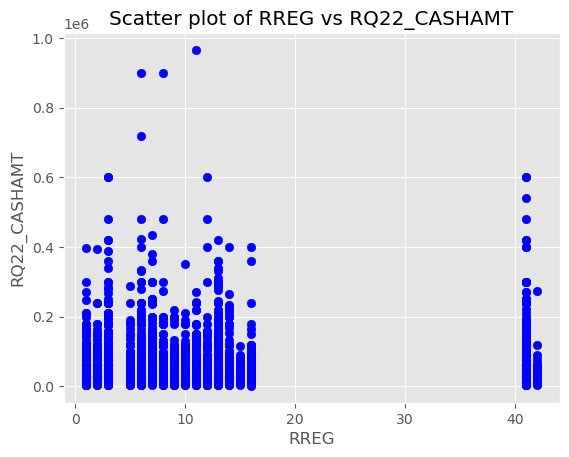

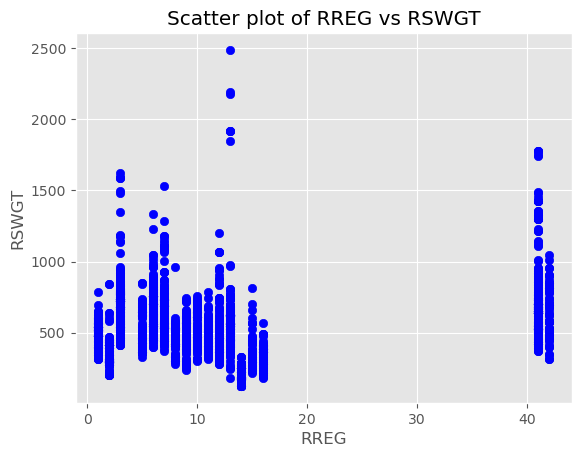

In [23]:


# Sample numerical data for each feature (mocked for illustration)
# Let's assume we have some numeric values corresponding to the feature names
np.random.seed(0)
num_samples = 400
feature_data = {
    'RREG': np.random.rand(num_samples) * 100,
    'HHNUM': np.random.rand(num_samples) * 100,
    'RPSU': np.random.rand(num_samples) * 100,
    'RQ4_AGE': np.random.rand(num_samples) * 100,
    'RQ7_MSTAT': np.random.rand(num_samples) * 100,
    'RQ10_REASON': np.random.rand(num_samples) * 100,
    'RQ14_INDWORK': np.random.rand(num_samples) * 100,
    'RQ19_REASON': np.random.rand(num_samples) * 100,
    'RQ21_CASHREM': np.random.rand(num_samples) * 100,
    'RQ22_CASHAMT': np.random.rand(num_samples) * 100,
    'RSWGT': np.random.rand(num_samples) * 100,
    'RP6M_IND': np.random.rand(num_samples) * 100,
    'RROTATION': np.random.rand(num_samples) * 100,
    'RQ18Y_DTRET': np.random.rand(num_samples) * 100,
    'RQ1_LNO': np.random.rand(num_samples) * 100,
    'RQ13_STAY': np.random.rand(num_samples) * 100,
    'RQ20M_DTEXP': np.random.rand(num_samples) * 100,
    'RQ245P_OTHERS': np.random.rand(num_samples) * 100,
    'RQ15_OCCUP1': np.random.rand(num_samples) * 100,
    'RQ242P_INVEST': np.random.rand(num_samples) * 100,
    'RQ16_NOMONTH': np.random.rand(num_samples) * 100
}

df = pd.DataFrame(feature_data)

# Pairs of positively correlated features
pairs = [
    ('RREG', 'HHNUM'),
    ('RREG', 'RPSU'),
    ('RREG', 'RQ4_AGE'),
    ('RREG', 'RQ7_MSTAT'),
    ('RREG', 'RQ10_REASON'),
    ('RREG', 'RQ14_INDWORK'),
    ('RREG', 'RQ19_REASON'),
    ('RREG', 'RQ21_CASHREM'),
    ('RREG', 'RQ22_CASHAMT'),
    ('RREG', 'RSWGT')
]

# Generating scatter plots for each pair of features
for feature_1, feature_2 in pairs:
    plt.figure()
    plt.scatter(data[feature_1], data[feature_2], c='blue')
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.title(f'Scatter plot of {feature_1} vs {feature_2}')
    plt.show()


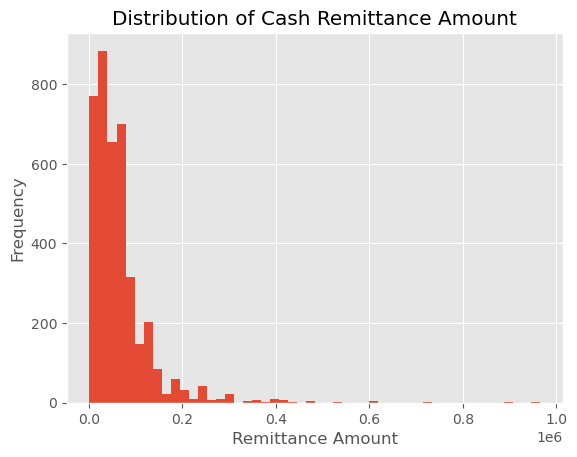

In [24]:
data['RQ22_CASHAMT'].hist(bins=50)
plt.title('Distribution of Cash Remittance Amount')
plt.xlabel('Remittance Amount')
plt.ylabel('Frequency')
plt.show()


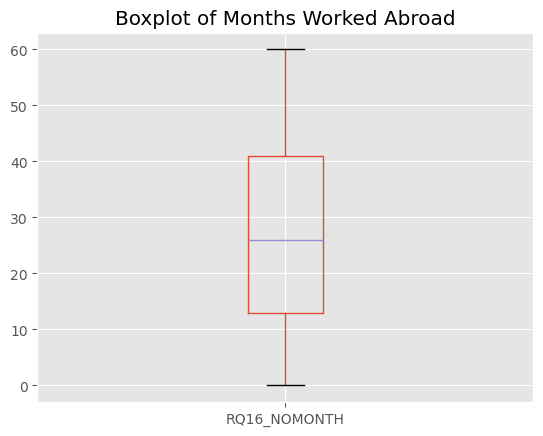

In [25]:
data.boxplot(column='RQ16_NOMONTH')
plt.title('Boxplot of Months Worked Abroad')
plt.show()


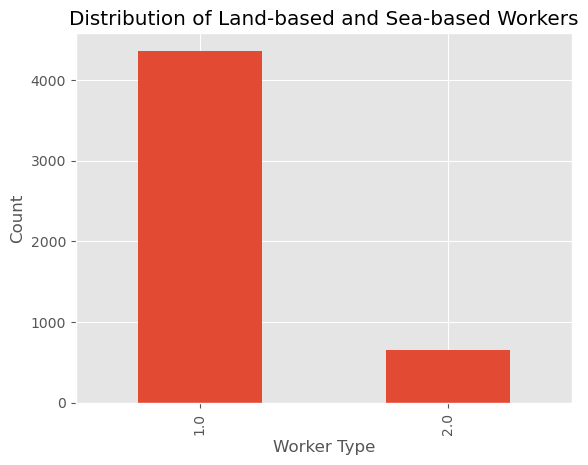

In [26]:
data['RQ11_BASE'].value_counts().plot(kind='bar')
plt.title('Distribution of Land-based and Sea-based Workers')
plt.xlabel('Worker Type')
plt.ylabel('Count')
plt.show()


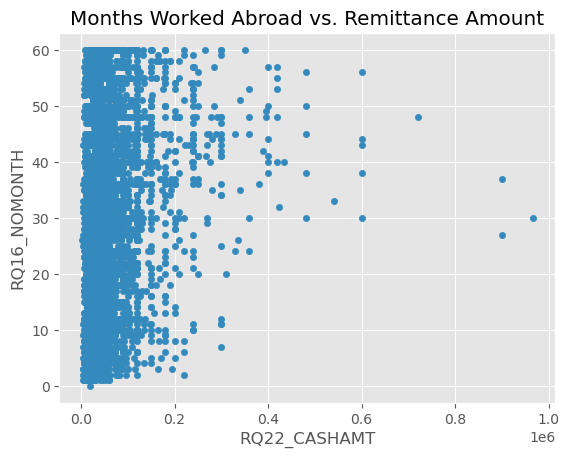

In [27]:
data.plot.scatter(x='RQ22_CASHAMT', y='RQ16_NOMONTH')
plt.title('Months Worked Abroad vs. Remittance Amount')
plt.show()


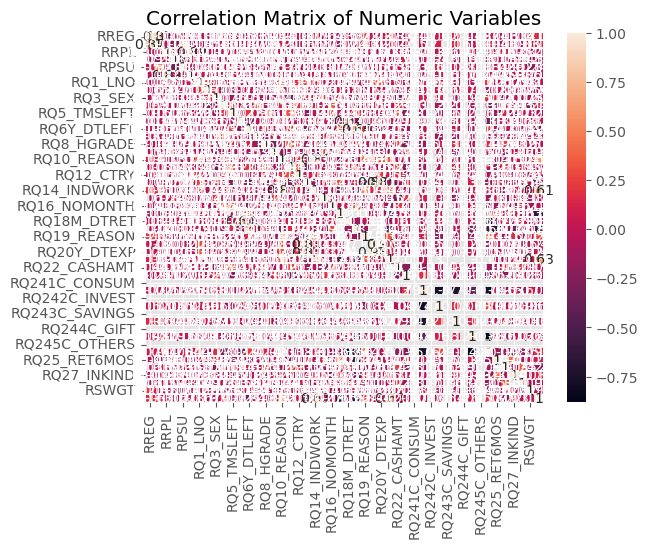

In [28]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


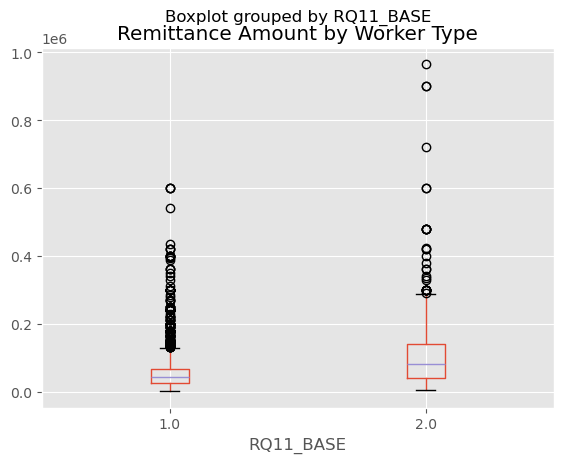

In [29]:
data.boxplot(column='RQ22_CASHAMT', by='RQ11_BASE')
plt.title('Remittance Amount by Worker Type')
plt.show()


In [30]:
pd.crosstab(data['RQ11_BASE'], data['RQ7_MSTAT'])


RQ7_MSTAT,1.0,2.0,3.0,4.0,5.0,6.0
RQ11_BASE,,,,,,
1.0,1518,2444,89,251,57,3
2.0,183,440,7,10,9,1
